In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import accuracy_score, classification_report


import seaborn as sns

from Forgetters.GradientBoostingForgetters import GBClassifierForgetter, GBRegressorForgetter
from Forgetters.AdaptiveBoostingForgetters import ABClassifierForgetter, ABRegressorForgetter
from CompressionStrategies.DropUnforgettable import DropUnforgettable

from utils import predictions_to_y
from DatasetLoader import DatasetLoader

In [32]:
bike_path = "datasets/bikes/day.csv"

In [33]:
bike_dataset = DatasetLoader(bike_path, "cnt", classification=False)
bike_dataset.keep_only_numerical_columns()
# bike_dataset.drop_column("registered")


In [34]:
X_train, X_test, y_train, y_test = bike_dataset.read_split(shuffle=False)

In [35]:
def get_compressed(forgetter, comp=DropUnforgettable(classification=False, epsilon=0.1)):
    forgetter.fit(X_train, y_train)
    return forgetter.transform(X_train, comp, y_train)

In [36]:
base_model = DecisionTreeRegressor(max_depth=2)
forg = ABRegressorForgetter(estimator=base_model, learning_rate=1 ,n_estimators=21)

In [37]:
epsilons = [10, 1, 0.1, 0.01, 0.001, 0.0001]
lengths = []
for epsilon in epsilons:
    comp = DropUnforgettable(classification=False, epsilon=epsilon)
    X, _ = get_compressed(ABRegressorForgetter(estimator=base_model, learning_rate=1 ,n_estimators=21), comp=comp)
    lengths.append(len(X))
print(lengths)

[0, 1, 264, 394, 432, 453]


In [38]:
lengths


[0, 1, 264, 394, 432, 453]

In [39]:
from sklearn.decomposition import PCA
def k_PCA(X, k):
    pca = PCA()
    X = pca.fit_transform(X)
    return X[:,:k]

import matplotlib.lines as mlines
def display_pca_and_labels(X, y, compresion_mask=[]):
    X = k_PCA(X, k=2)
    pc1 = X[:,0]
    pc2 = X[:,1]
    
    cmap = plt.get_cmap('coolwarm')
    norm = plt.Normalize(vmin=y.min(), vmax=y.max())
    y_colors = cmap(norm(y))
    
    if compresion_mask is None:
        plt.scatter(pc1, pc2, facecolors='none', c=y, cmap='coolwarm')
    else:
        kept_points = compresion_mask
        removed_points = ~compresion_mask
        plt.scatter(pc1[kept_points], pc2[kept_points], c=y_colors[kept_points], cmap='coolwarm')
        plt.scatter(pc1[removed_points], pc2[removed_points], facecolors='none', edgecolors=y_colors[removed_points], cmap='coolwarm')
     
    filled_marker = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=8, label="Point gardés")
    if compresion_mask is None:
        handles_list = [filled_marker]
    else:
        hollow_marker = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=8, markerfacecolor='none', label="Points enlevés")
        handles_list = [filled_marker, hollow_marker]
    

    plt.legend(handles=handles_list, loc="upper right", title="Légende")

        
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA - 2 Composantes principales de X avec valeurs y en couleur")
    plt.grid()
    plt.show()  

C:\Users\Antoine\AppData\Local\Temp\ipykernel_31180\598174845.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pc1[removed_points], pc2[removed_points], facecolors='none', edgecolors=y_colors[removed_points], cmap='coolwarm')


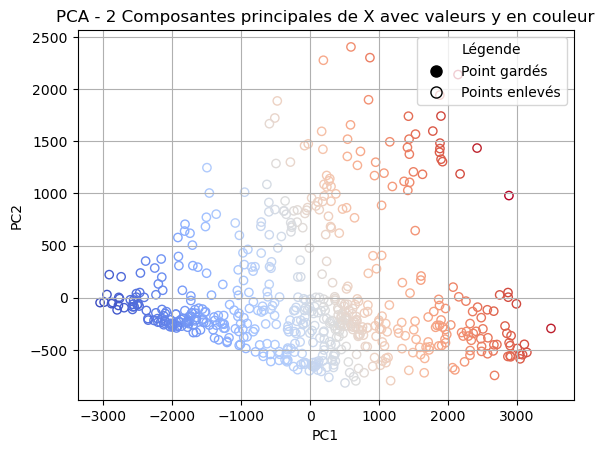

C:\Users\Antoine\AppData\Local\Temp\ipykernel_31180\598174845.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pc1[kept_points], pc2[kept_points], c=y_colors[kept_points], cmap='coolwarm')
C:\Users\Antoine\AppData\Local\Temp\ipykernel_31180\598174845.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pc1[removed_points], pc2[removed_points], facecolors='none', edgecolors=y_colors[removed_points], cmap='coolwarm')


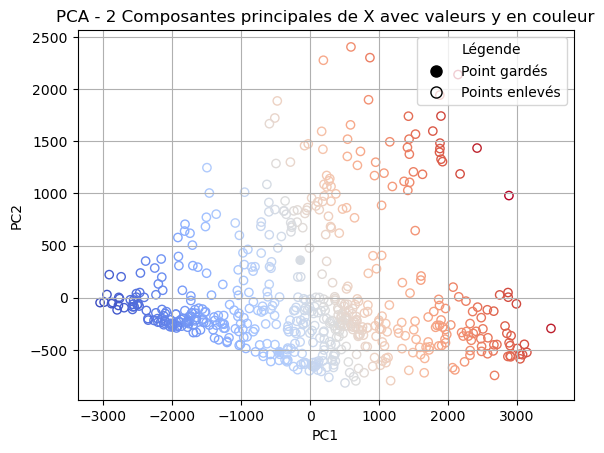

C:\Users\Antoine\AppData\Local\Temp\ipykernel_31180\598174845.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pc1[kept_points], pc2[kept_points], c=y_colors[kept_points], cmap='coolwarm')
C:\Users\Antoine\AppData\Local\Temp\ipykernel_31180\598174845.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pc1[removed_points], pc2[removed_points], facecolors='none', edgecolors=y_colors[removed_points], cmap='coolwarm')


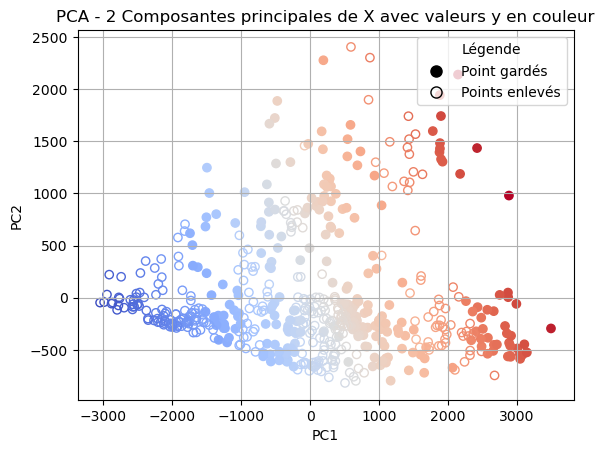

C:\Users\Antoine\AppData\Local\Temp\ipykernel_31180\598174845.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pc1[kept_points], pc2[kept_points], c=y_colors[kept_points], cmap='coolwarm')
C:\Users\Antoine\AppData\Local\Temp\ipykernel_31180\598174845.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pc1[removed_points], pc2[removed_points], facecolors='none', edgecolors=y_colors[removed_points], cmap='coolwarm')


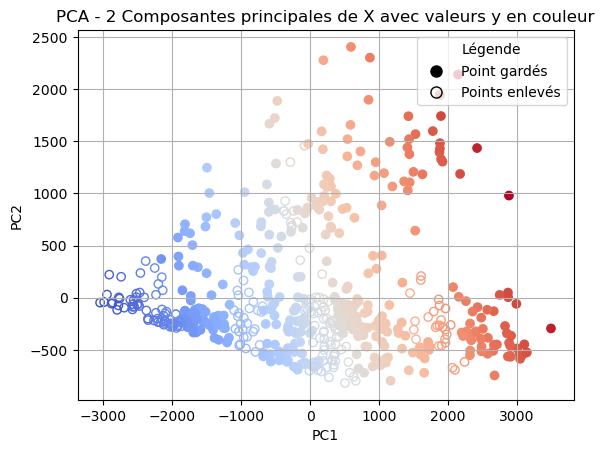

C:\Users\Antoine\AppData\Local\Temp\ipykernel_31180\598174845.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pc1[kept_points], pc2[kept_points], c=y_colors[kept_points], cmap='coolwarm')
C:\Users\Antoine\AppData\Local\Temp\ipykernel_31180\598174845.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pc1[removed_points], pc2[removed_points], facecolors='none', edgecolors=y_colors[removed_points], cmap='coolwarm')


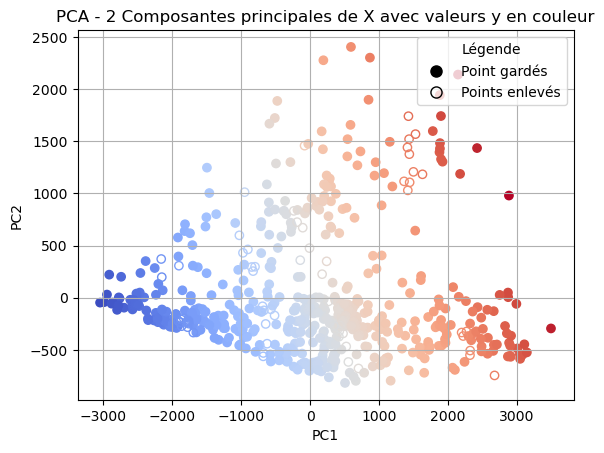

C:\Users\Antoine\AppData\Local\Temp\ipykernel_31180\598174845.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pc1[kept_points], pc2[kept_points], c=y_colors[kept_points], cmap='coolwarm')
C:\Users\Antoine\AppData\Local\Temp\ipykernel_31180\598174845.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pc1[removed_points], pc2[removed_points], facecolors='none', edgecolors=y_colors[removed_points], cmap='coolwarm')


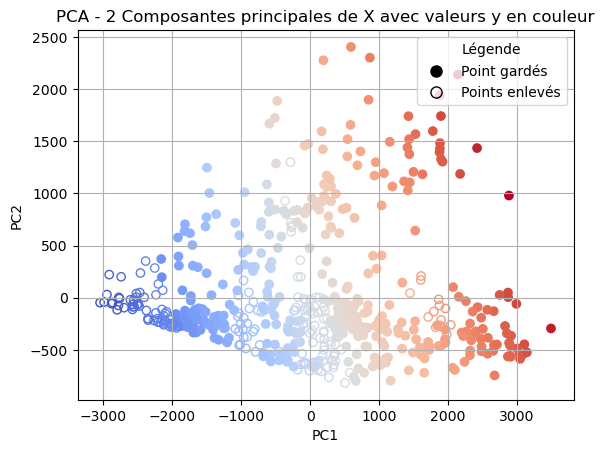

In [40]:
epsilons = [10, 1, 0.1, 0.01, 0.001, 0.0001]

for epsilon in epsilons:
    comp = DropUnforgettable(classification=False, epsilon=epsilon)
    forg = ABRegressorForgetter(estimator=base_model, learning_rate=1 ,n_estimators=21)
    
    forg.fit(X_train,y_train)
    mask = forg.get_mask(comp)
    
    display_pca_and_labels(X_train,y_train, mask)

In [41]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


def get_compressed(forgetter, comp=DropUnforgettable(classification=False, epsilon=0.1)):
    forgetter.fit(X_train, y_train)
    return 

predictive_model = RandomForestRegressor(n_estimators=51, max_depth=3)
from sklearn.metrics import r2_score
def get_R_squared(X, y):
    predictive_model.fit(X, y)
    y_pred = predictive_model.predict(X_test)
    return r2_score(y_test, y_pred)
    

N = []
Accuracy = []
initial_epsilon = 0.001
step = 1.001
epsilon = initial_epsilon
last_dataset_length = len(X_train)

comp_model = ABRegressorForgetter(estimator=base_model, learning_rate=1, n_estimators=21)

comp_model.fit(X_train, y_train)
while (epsilon < 1000):
    comp_strat = DropUnforgettable(classification=False, epsilon=epsilon)
    X_train_compressed, y_train_compressed = comp_model.transform(X_train, comp_strat, y=y_train)
    new_len = X_train_compressed.shape[0]
    
    if new_len == 0: break
    
    if new_len < last_dataset_length:
        score = get_R_squared(X_train_compressed, y_train_compressed)
        Accuracy.append(score)
        
        N.append(new_len)
        last_dataset_length = new_len     
        
    epsilon = epsilon * step


In [42]:
from sklearn.utils import shuffle

X_train_shuf, y_train_shuf = shuffle(X_train, y_train, random_state=123)

predictive_model = RandomForestRegressor(n_estimators=51, max_depth=3)
from sklearn.metrics import r2_score
def get_R_squared(X, y):
    predictive_model.fit(X, y)
    y_pred = predictive_model.predict(X_test)
    return r2_score(y_test, y_pred)


Accuracy_baseline = []
N_baseline = []
n = len(X_train)
for i in range(1,n, 25):
    score = get_R_squared(X_train_shuf[:i], y_train_shuf[:i])
    Accuracy_baseline.append(score)
    N_baseline.append(i)

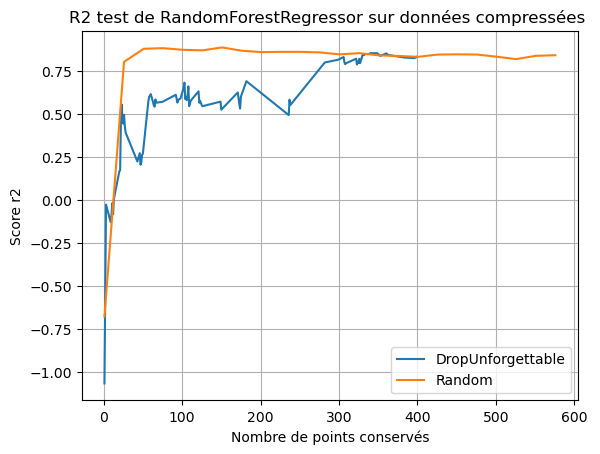

In [43]:

plt.plot(N, Accuracy, label="DropUnforgettable")
plt.plot(N_baseline, Accuracy_baseline, label="Random")

plt.legend()
plt.xlabel("Nombre de points conservés")
plt.ylabel("Score r2")
plt.title("R2 test de RandomForestRegressor sur données compressées ")
plt.grid()
plt.show()  
